> # **RANDOM FOREST**
> Random Forest is like a team of decision trees that collaborate to provide a single output. Imagine a group of tree experts each with their own unique insights coming together to make a collective decision.<br><br>
> Random Forest is an `ensemble of Decision Trees` generally trained via the `bagging method or sometimes pasting`.<br><br>
> Here’s how it works:
> - During training, it creates multiple decision trees, each using a random subset of the dataset and measuring a random subset of features in each partition.
This randomness introduces variability among individual trees, which helps reduce overfitting (when a model fits the training data too closely) and improves overall prediction performance.<br><br>
> - For prediction, the algorithm aggregates the results of all these trees. For classification tasks, it uses voting; for regression tasks, it averages the predictions.

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons, make_circles
from sklearn.ensemble import RandomForestClassifier

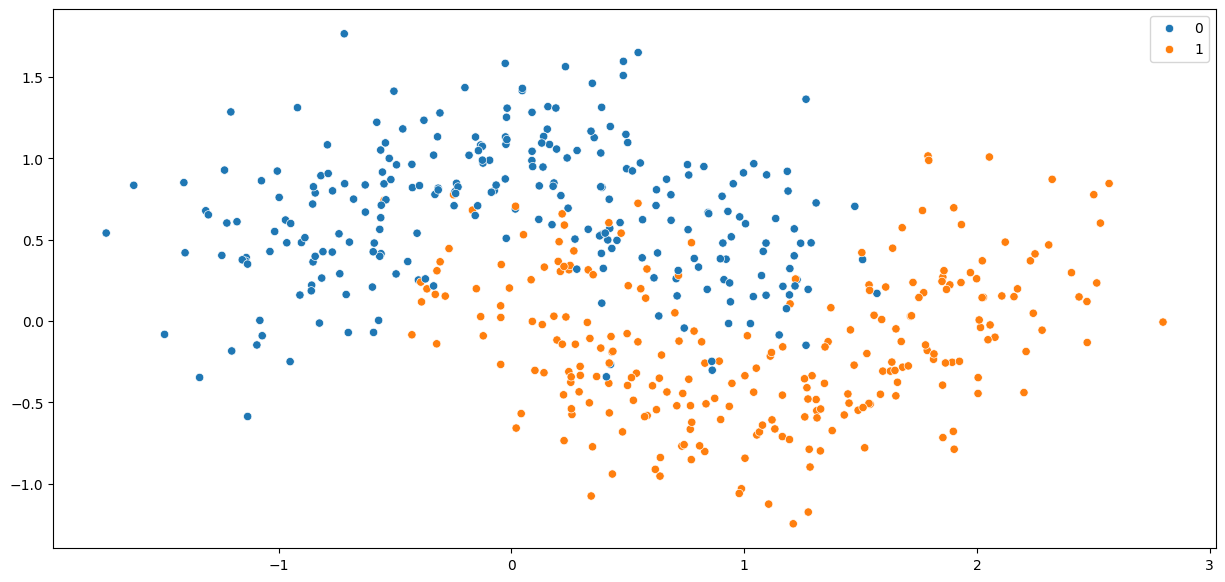

In [2]:
X, y = make_moons(
    n_samples=500,
    noise=0.3,
    random_state=42
)
plt.figure(figsize = (15, 7))
sns.scatterplot(x = X[:, :1].reshape(-1), y = X[:, 1].reshape(-1), hue=y)
plt.show()

In [17]:
clf = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=10,
    oob_score=True,
    random_state=42,
)
clf.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=500, oob_score=True,
                       random_state=42)

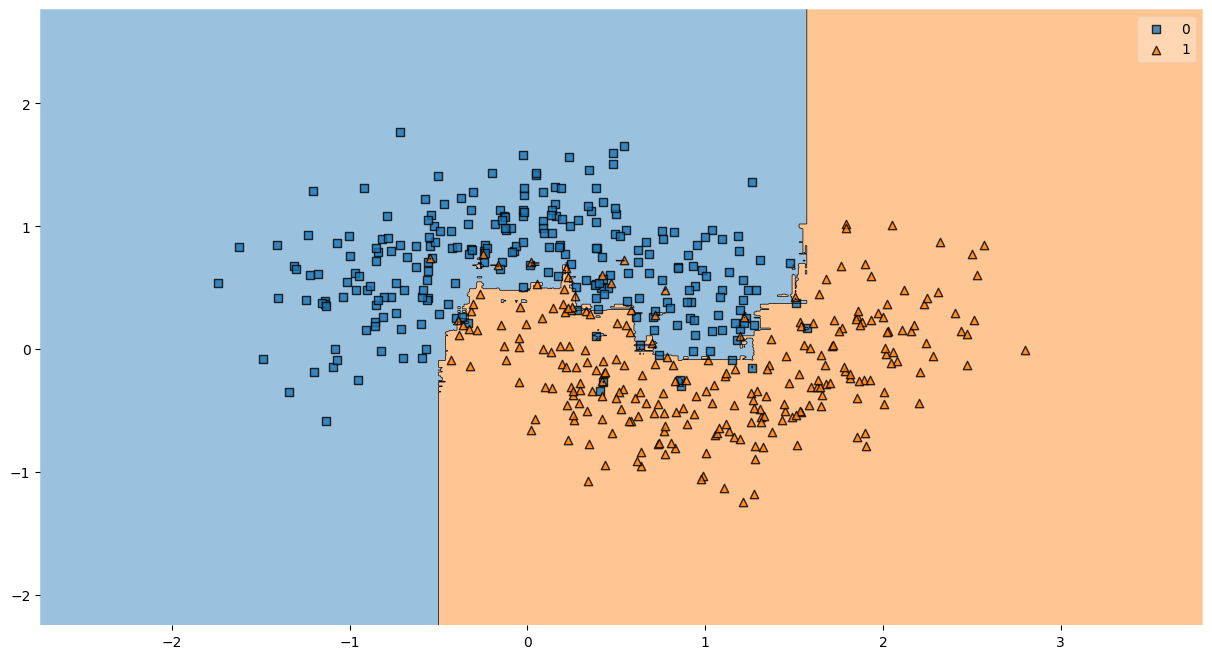

In [18]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(15, 8))
plot_decision_regions(
    X, y, clf
)
plt.show()

In [19]:
clf.oob_score_

0.896

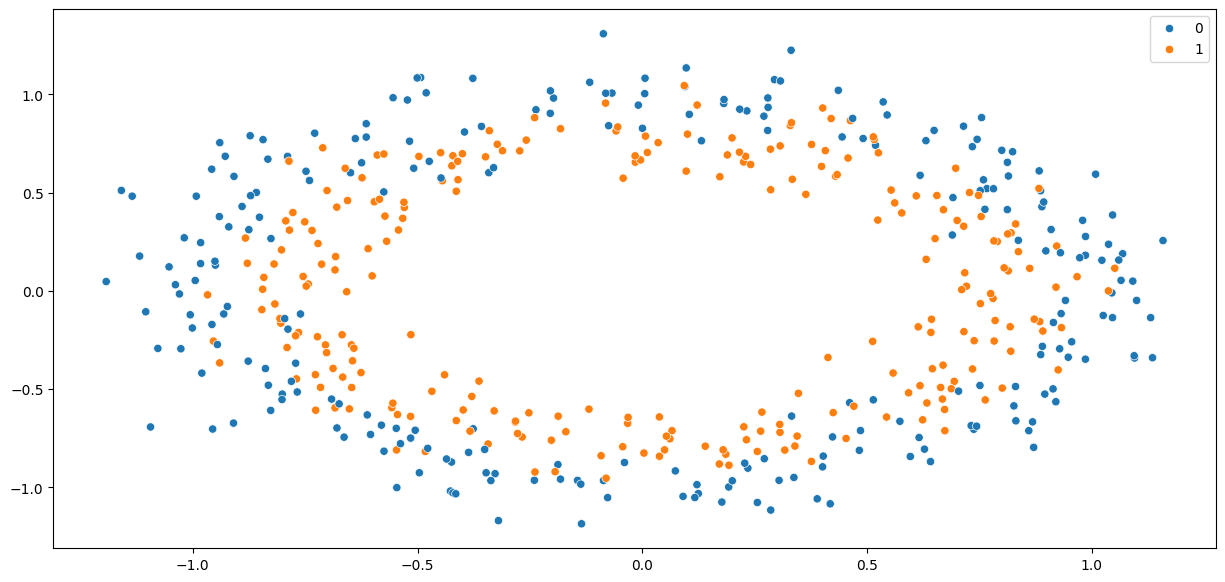

In [39]:
X, y = make_circles(
    n_samples=500,
    noise=0.1,
    random_state=42,
    factor=0.8
)
plt.figure(figsize = (15, 7))
sns.scatterplot(x = X[:, :1].reshape(-1), y = X[:, 1].reshape(-1), hue=y)
plt.show()

In [40]:
clf = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=10,
    oob_score=True,
    random_state=42,
)
clf.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=500, oob_score=True,
                       random_state=42)

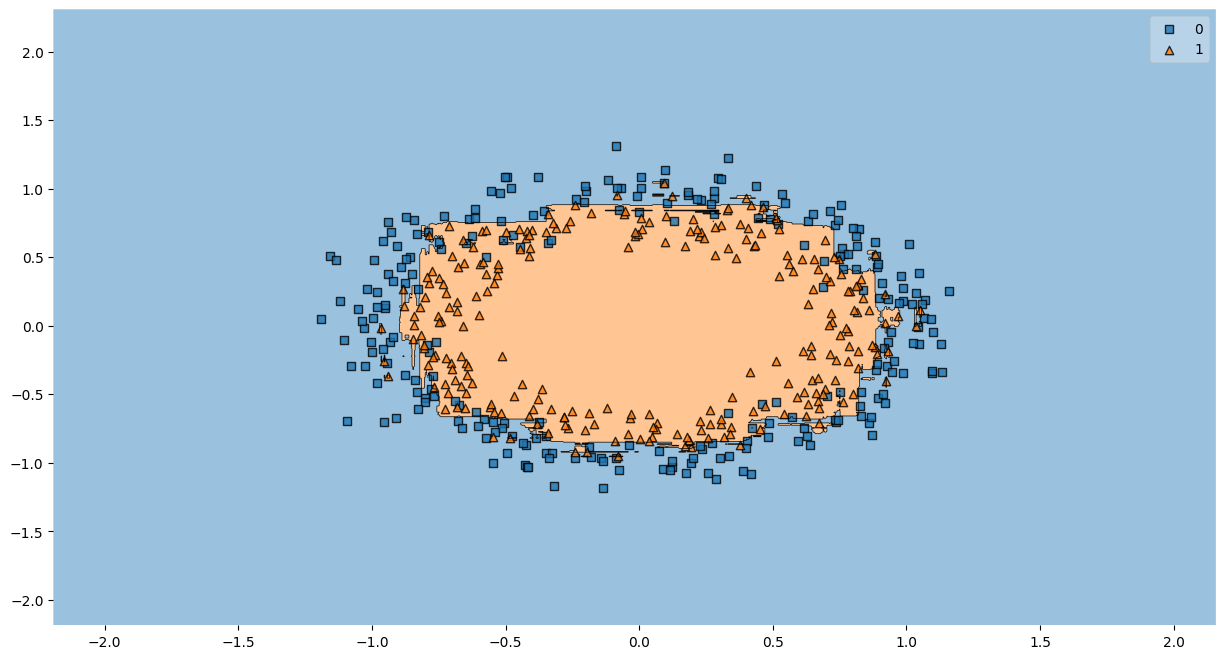

In [41]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(15, 8))
plot_decision_regions(
    X, y, clf
)
plt.show()

<hr>

> ### FEATURE IMPORTANCE
> Yet another great quality of Random Forests is that they make it easy to `measure the relative importance of each feature`. Scikit-Learn measures a feature’s importance by looking at how much the tree nodes that use that feature reduce impurity on average (across all trees in the forest). More precisely, it is a `weighted average`, where each node’s weight is equal to the number of training samples that are associated with it.<br><br>
> `Node Importance`: <br><br>
> 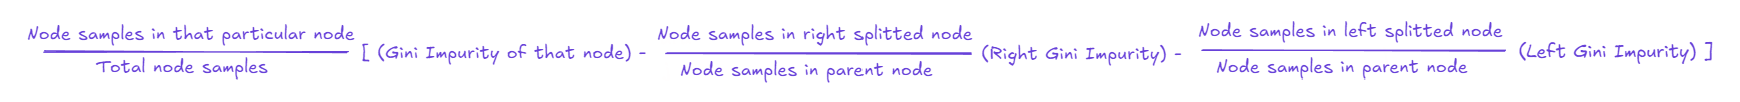<br><br>
> `Feature Importance` = 
> Sum(Node Importance of that column) / Total Node Importance

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [44]:
clf = RandomForestClassifier(
    n_estimators=500,
    criterion='gini',
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features='sqrt',
    max_samples=0.8,
    bootstrap=True,
    n_jobs=-1,
    oob_score=True,
    random_state=42,
)

clf.fit(X, y)

RandomForestClassifier(max_depth=10, max_samples=0.8, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=500, n_jobs=-1,
                       oob_score=True, random_state=42)

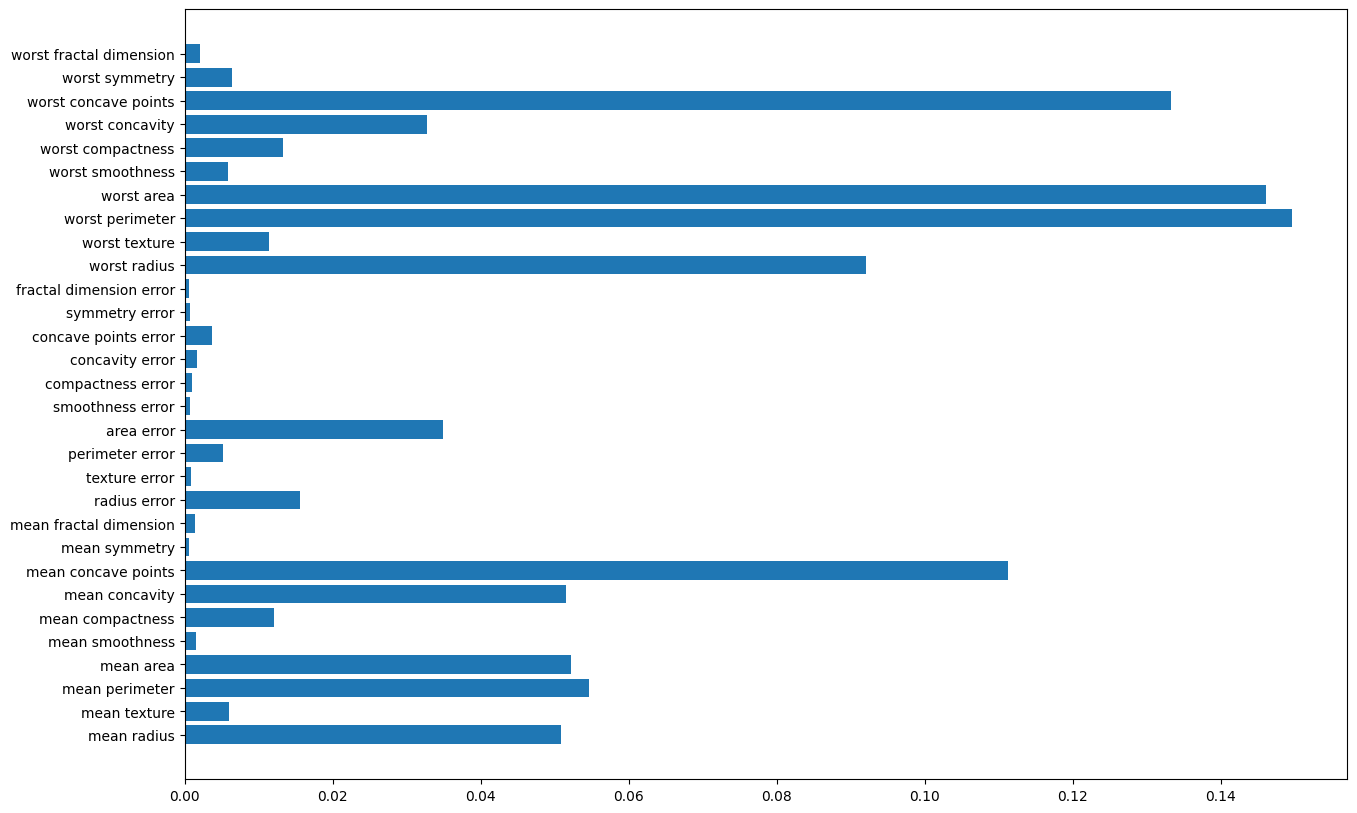

In [59]:
plt.figure(figsize=(15, 10))
plt.barh(y = X.columns, width = clf.feature_importances_)
plt.show()

> ### Comparison with Other Ensemble Models:
> - `Bagging`: Another ensemble method where multiple weak models (often decision trees) are trained on different subsets of the training data. Bagging averages their predictions for regression or uses majority vote for classification. `In Bagging the features are selected before creating a decision tree, were in Random Forest the features are every time sampled at each splitting branch in decision tree which makes them more random and generalize`<br><br>
> - `Boosting`: Trains multiple base models sequentially, with each model correcting errors made by the previous ones. Boosting adapts to the data by modifying the dataset for each subsequent model.